<a href="https://colab.research.google.com/github/MunkhgerelM/ML_assignment-_1_munkhgerelm/blob/main/ML_SP24_Assignment_1_Munkhgerel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning (BSc - SP24)**
## Assignment - 1
## Munkhjargal Munkhgerel
## May 3rd, 2024

<a id="ref2"></a>
# TASK 1: Linear Regression

Use the family of models f(x, theta) = theta_0 + theta_1 * x_1 + theta_2 * x_2 + theta_3 * cos(x_1) + theta_4 * x_2 * x_2 + theta_5 * tanh(x_1)  to fit the data (File: data.npz):

*   Write in the report the formula of the model substituting parameters theta_0, ..., theta_5 with the estimates you've found;
*   Evaluate your model's test performance using the mean squared error as a performance measure.
*   Implement Lasso Regression, what do you observe? What can you infer about the given family of models?


##### Step 1: Importing Required Libraries

In [136]:
import numpy as np                                      # Library for arrays
import seaborn as sns                                   # Data visualization based on matplotlub
import pandas as pd                                     # Library for data manipulation
from sklearn.metrics import mean_squared_error          # Function to calculate the Mean Squared Error (our performance measure)
import numpy as np                                      # Library for arrays
import matplotlib.pyplot as plt                         # Library for plotting
import joblib                                           # Caches the output of functions in a specific location
import io                                               # For file handling
import requests                                         # HTTP libraries
import torch
import os
import requests
%matplotlib inline

###### Loading the Dataset


In [137]:
# Here I used followed the given example and loaded the data in url form.
url = 'https://drive.switch.ch/index.php/s/37RuoA3Mgt9Rqah/download'
response = requests.get(url)
data = np.load(io.BytesIO(response.content))
print(data.keys())

KeysView(NpzFile 'object' with keys: y, x)


In [138]:
len(data)

2

In [139]:
x = data.f.x        # x is a Numpy array of shape (n_samples, n_features) with the inputs
y = data.f.y        # y is a Numpy array of shape (n_samples, ) with the targets

#T1
print("theta: ")
print("Mean squared error: ")
#T2
print("Everything useful")

theta: 
Mean squared error: 
Everything useful


In [140]:
print('x:', x)
print('y:', y)

x: [[ 1.77799538 -3.43755175]
 [ 0.08003613 -2.69946749]
 [-0.63279495  0.76929554]
 ...
 [ 2.26550331  1.9031415 ]
 [ 0.5467721   5.79427086]
 [ 4.06104803  1.95074032]]
y: [48.24445965 33.01550827 -1.82426351 ...  8.52438536 53.90352715
 17.1268874 ]


In [141]:
# Creating the dataframe and added y column to the x1 and x2
df = pd.DataFrame(data['x'], columns=['x1', 'x2'])
df['y'] = data['y']
df

,x1,x2,y
0,1.777995,-3.437552,48.244460
1,0.080036,-2.699467,33.015508
2,-0.632795,0.769296,-1.824264
3,1.630918,3.938129,21.134389
4,-1.881666,0.248490,-10.453053
...,...,...,...
3995,3.168750,-0.843948,15.122276
3996,1.223495,5.916633,52.784662
3997,2.265503,1.903142,8.524385
3998,0.546772,5.794271,53.903527


###### Defining x and y


In [142]:
# Defining the family of model f(x,theta)
def model_function(x, theta):
    x1, x2 = x[:, 0], x[:, 1]
    y = theta[0] + theta[1] * x1 + theta[2] * x2 + theta[3] * np.cos(x1) + theta[4] * x2**2 + theta[5] * np.tanh(x1)
    return y

df['cos_x1'] = np.cos(df['x1'])
df['x2^2'] = df['x2']**2
df['tan_x1'] = np.tan(df['x1'])
df

,x1,x2,y,cos_x1,x2^2,tan_x1
0,1.777995,-3.437552,48.244460,-0.205720,11.816762,-4.757012
1,0.080036,-2.699467,33.015508,0.996799,7.287125,0.080207
2,-0.632795,0.769296,-1.824264,0.806378,0.591816,-0.733404
3,1.630918,3.938129,21.134389,-0.060085,15.508859,-16.612987
4,-1.881666,0.248490,-10.453053,-0.305887,0.061747,3.112483
...,...,...,...,...,...,...
3995,3.168750,-0.843948,15.122276,-0.999631,0.712248,0.027164
3996,1.223495,5.916633,52.784662,0.340362,35.006548,2.762633
3997,2.265503,1.903142,8.524385,-0.640160,3.621948,-1.200076
3998,0.546772,5.794271,53.903527,0.854207,33.573575,0.608673


##### **Step 2: Split the dataset into a training set and a testing set**


**The training data** set is a subset of the whole data set which is used to train a model. When training a model, do not train on both the testing and training data sets. This will cause the model to become overfit on the sample data.

**The testing data** set is the subset of the data used to evaluate a trained model. In order to properly evaluate a model the testing data set needs to share similar characteristics to the training data set; for example if the data is normally distributed for the training data the testing subset should also be normally distributed. The test data set needs to be large enough where the results are statistically significant.

**Split:** Machine learning algorithm is trained on as much data as possible. However the model also needs to be tested on data points that have not been used to train it. By default many packages split the training data set to 80%/70% of the given data and 20%/30% for the testing data set.

Often times data can be split randomly to create a representative sample of the original set. However if data contains clusters or autocorrelation, this needs to be factored into the split.

When splitting data, it is best practice to recreate the exact split between the training and testing data sets. The split can be reproduced by seeding a random split.

In [143]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split

# data has y as the last column
data = df.drop('y', axis=1)
data['y'] = df['y']

# 70% of the data will be used for training and 30% for testing
train, test= train_test_split(data, test_size=0.7, shuffle=True, random_state=0)


In [144]:
# Normalization is the transformation applied to numeric features of a model to make it perform better
# Used StandardScale to prevent data leakage from the testing set into the training set
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

test_scaled

array([[ 0.1165736 ,  0.8318785 , -0.23450796,  0.39549502, -0.0868782 ,
         0.02103473],
       [ 1.17148589, -1.16770799, -1.00764537, -0.60787233, -0.01261287,
         0.31032146],
       [-1.46940562, -0.72401461,  0.20992995, -0.91443752, -0.14209354,
        -1.41085923],
       ...,
       [-1.18600195, -0.16445101,  0.99232018, -0.87071098, -0.03986278,
        -1.34321266],
       [-1.05123097, -1.19574992,  1.27024208, -0.57835636, -0.03337534,
        -0.25193566],
       [ 0.3308813 ,  0.33044033, -0.8244644 , -0.43200219, -0.04150782,
        -0.73426148]])

In [145]:
# Splitting the scaled training and test sets into feature X and target variable Y
x_train = train_scaled[:, :-1]
y_train = train_scaled[:, -1]
x_test = test_scaled[:, :-1]
y_test = test_scaled[:, -1]

In [146]:
x_test

array([[ 0.1165736 ,  0.8318785 , -0.23450796,  0.39549502, -0.0868782 ],
       [ 1.17148589, -1.16770799, -1.00764537, -0.60787233, -0.01261287],
       [-1.46940562, -0.72401461,  0.20992995, -0.91443752, -0.14209354],
       ...,
       [-1.18600195, -0.16445101,  0.99232018, -0.87071098, -0.03986278],
       [-1.05123097, -1.19574992,  1.27024208, -0.57835636, -0.03337534],
       [ 0.3308813 ,  0.33044033, -0.8244644 , -0.43200219, -0.04150782]])

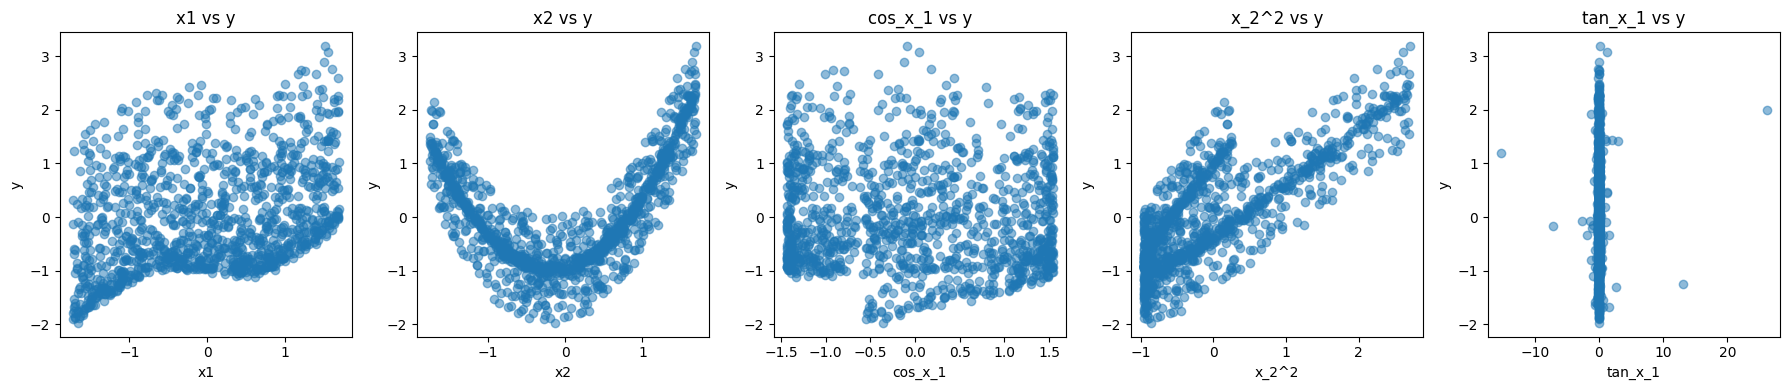

In [147]:
# Plotting x feature against the Target variable y
fig, axs = plt.subplots(1, 5, figsize=(18, 4))

features = ['x1', 'x2', 'cos_x_1', 'x_2^2', 'tan_x_1']

for i, feature in enumerate(features):
    axs[i].scatter(x_train[:, i], y_train, alpha=0.5)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('y')
    axs[i].set_title(f'{feature} vs y')

plt.tight_layout()
plt.show()

###### Our model: Linear prior

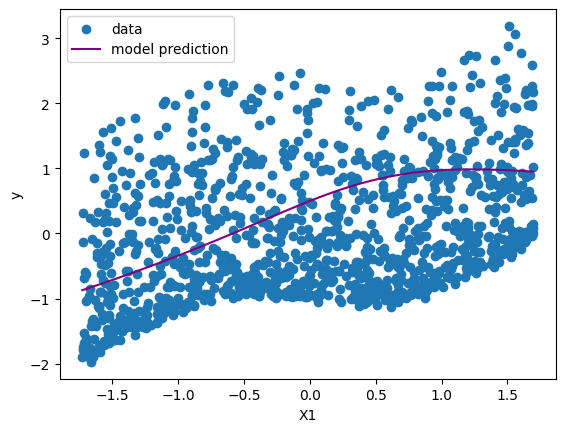

In [148]:
#Plotting linear prior (lab session)
plt.scatter(x_train[:, 0], y_train, label='data')
plt.xlabel("X1")
plt.ylabel("y")

equally_spaced_points = np.linspace(start=x_train[:, 0].min(), stop=x_train[:, 0].max(), num=1000)
theta_mock = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]  # for illustrative purpose, replace this with real estimated parameters

x_mock = np.zeros((len(equally_spaced_points), 6))
x_mock[:, 0] = equally_spaced_points

plt.plot(equally_spaced_points, model_function(x_mock, theta=theta_mock), 'purple', label='model prediction')
plt.legend()
plt.show()

#### Step 3: Model Training
Train a linear regression and a lasso regression model on the training data.


In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



## **Linear Regression**

##### Training our model

Below is (following the LAB session)

In [150]:
# Loading the linear regression model
lr_model = LinearRegression()

# Fitting the model to the training data
lr_model.fit(x_train, y_train)

LinearRegression()

In [151]:
# Storing the estimated parameters in the coefficient and intercept of the LinearRegression.
theta_1_to_5 = lr_model.coef_
theta_0 = lr_model.intercept_

# Combinining all thetas into one array
theta_hat = np.append(theta_0, theta_1_to_5)
print(f"Estimated parameters for Linear Regression: \ntheta_0: {theta_0} \ntheta_1_to_5: {theta_1_to_5}")

Estimated parameters for Linear Regression: 
theta_0: -1.244371742857695e-16 
theta_1_to_5: [ 0.4895406  -0.60813089  0.2272016   1.26079112 -0.00135446]


In [152]:
print(f"f(x, theta) = {theta_0} + {theta_1_to_5[0]}*x1 + {theta_1_to_5[1]}*x2 + {theta_1_to_5[2]}*cos(x1) + {theta_1_to_5[3]}*x2^2 + {theta_1_to_5[4]}*tanh(x1)")

f(x, theta) = -1.244371742857695e-16 + 0.48954060051099735*x1 + -0.6081308918422209*x2 + 0.22720160152346763*cos(x1) + 1.260791117905282*x2^2 + -0.0013544614009348421*tanh(x1)


##### Evaluating the model performance using the Mean Squared Error as a performance measure

In [153]:
# Numerically validate the results/ or Prediction on Training and Testing data
# Train
train_prediction = lr_model.predict(x_train)
train_performance = mean_squared_error(y_train, train_prediction)

# Test
test_prediction = lr_model.predict(x_test)
test_performance = mean_squared_error(y_test, test_prediction)

print(f"LR - Train performance (MSE): \t{train_performance:.5f}")
print(f"LR - Test performance (MSE): \t{test_performance:.5f}")

LR - Train performance (MSE): 	0.00323
LR - Test performance (MSE): 	0.00329


##### Visualizing the Actual vs Predicted values


<ipython-input-154-048888c6c253>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k-', color = 'red', label='Prediction')


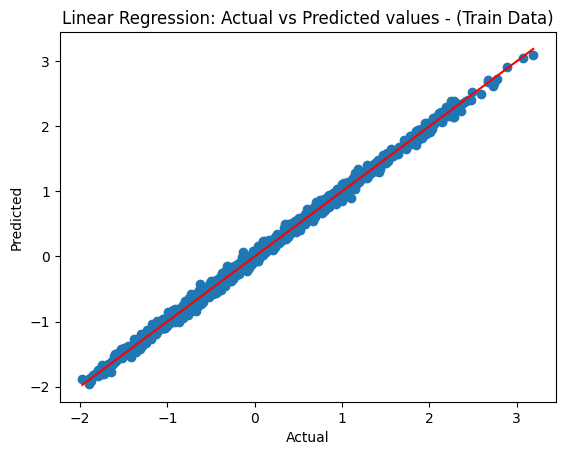

In [154]:
# Training
plt.scatter(y_train, train_prediction,label='Train Data' )
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k-', color = 'red', label='Prediction')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Actual vs Predicted values - (Train Data)")
plt.show()

<ipython-input-158-0347536fccfb>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', color = 'red', label = 'Prediction')


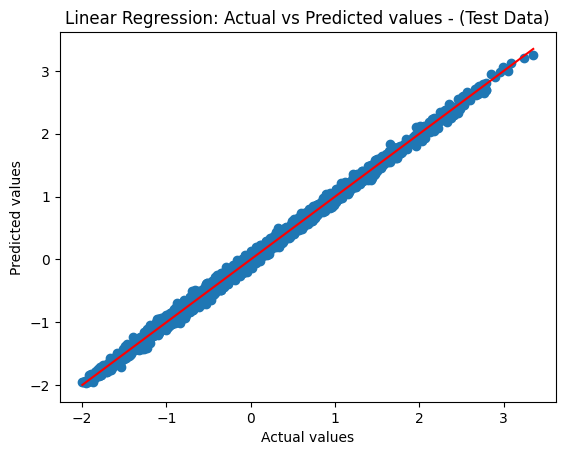

In [158]:
# Test
plt.scatter(y_test, test_prediction, label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', color = 'red', label = 'Prediction')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Linear Regression: Actual vs Predicted values - (Test Data)")
plt.show()

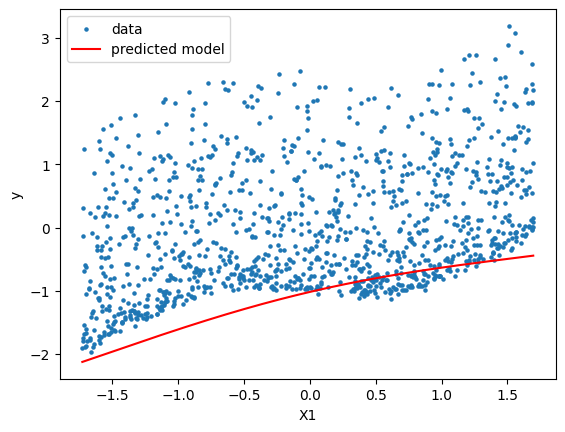

In [159]:
#Plotting linear after/ with estimated thetas
def model_function(x, theta):
    x1, x2 = x[:, 0], x[:, 1]
    y = theta[0] + theta[1] * x1 + theta[2] * x2 + theta[3] * np.cos(x1) + theta[4] * x2**2 + theta[5] * np.tanh(x1)
    return y

plt.scatter(x_train[:, 0], y_train, label='data',s=5)
plt.xlabel("X1")
plt.ylabel("y")

# Generates 1000 equally spaced points within the range of the first feature
equally_spaced_points = np.linspace(start=x_train[:, 0].min(), stop=x_train[:, 0].max(), num=1000)
theta_estimated = [-1.244371742857695, 0.4895406 , -0.60813089,  0.2272016,   1.26079112, -0.0013544]

x2_mean = np.mean(x_train[:, 1]) # get average of second feature
x_estimated= np.column_stack((equally_spaced_points, x2_mean + np.zeros_like(equally_spaced_points), np.cos(equally_spaced_points), (x2_mean + np.zeros_like(equally_spaced_points))**2, np.tanh(equally_spaced_points)))

plt.plot(equally_spaced_points, model_function(x_estimated, theta=theta_estimated), 'red', label='predicted model')
plt.legend()
plt.show()

###### COVARIANCE MATRIX

In [160]:
ones_vector = np.ones(shape=(x_train.shape[0], 1))    # Create 1200 ones
x_compact = np.hstack((ones_vector, x_train))         # The compact input

sigma_square = train_performance / (x_train.shape[0] - x_train.shape[1])
theta_var =  np.linalg.inv(np.dot(x_train.T, x_train)) * sigma_square

print(f'theta_hat[0]: {lr_model.intercept_:.7f}')
print(f'Var[theta_hat[0]]: {theta_var[0,0]:.7f}')


theta_hat[0]: -0.0000000
Var[theta_hat[0]]: 0.0000000


Text(0.5, 1.0, 'Processed covariance matrix of $\\hat{\\theta}$')

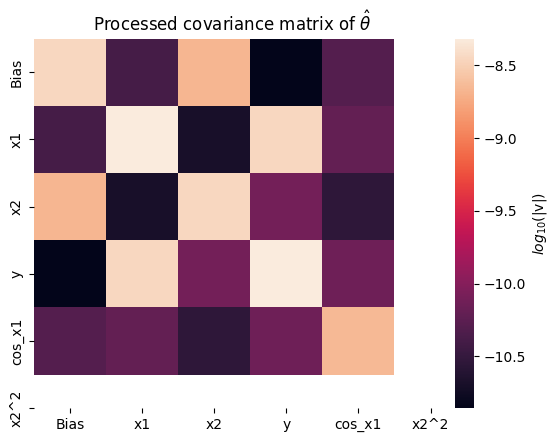

In [161]:
import seaborn as sns

ticklabels = df.keys()[:-1].insert(0, 'Bias')

fig = sns.heatmap(np.log10(np.abs(theta_var)), cbar_kws={'label':r'$log_{10}$(|v|)'},  # Notice we calculated the log of the absolute of theta_var
                  xticklabels=ticklabels, yticklabels=ticklabels)
fig.set_title(r'Processed covariance matrix of $\hat{\theta}$')

## Lasso Regression
When a model suffers from high variance, a technique called regularization is often deployed in order to combat its tendency to overfit. For instance, Ridge and Lasso are two classic forms of linear regression that reduce the complexity of a model by adding penalty terms to their loss functions.

Lasso regression is a linear regression method that uses L1 regularization, which can help in feature selection by making some of the coefficients equal to zero.

#### Using the Lasso model for prediction and performance calculation:

In [162]:
from sklearn.linear_model import Lasso

# Initializing Lasso model, fitting it, and geting coefficients
lasso_model = Lasso().fit(x_train, y_train)
theta_0_lasso= lasso_model .intercept_
theta_1_5_lasso = lasso_model.coef_

print('theta_0:', theta_0_lasso)
print('theta 1 to 5:', theta_1_5_lasso)

theta_0: 2.3684757858670008e-17
theta 1 to 5: [ 0.  0. -0.  0.  0.]


Substituting the obtained estimates in our models to write the final formulas:

In [163]:
print(f"Lasso Regression Model: \n f(x, theta) = {theta_0_lasso} + {theta_1_5_lasso[0]}*x1 + {theta_1_5_lasso[1]}*x2 + {theta_1_5_lasso[2]}*cos(x1) + {theta_1_5_lasso[3]}*x2^2 + {theta_1_5_lasso[4]}*tanh(x1)")

Lasso Regression Model: 
 f(x, theta) = 2.3684757858670008e-17 + 0.0*x1 + 0.0*x2 + -0.0*cos(x1) + 0.0*x2^2 + 0.0*tanh(x1)


#### Calculating MSE as a performance measure

In [164]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Prediction on Train and Test data
y_pred_lasso_test = lasso_model.predict(x_test)
y_pred_lasso_train = lasso_model.predict(x_train)

# Cross-validation scores
scores_mse = cross_val_score(lasso_model, x_train, y_train, scoring='neg_mean_squared_error', cv=5)

# Calculating MSE as a performance measure
lasso_test_mse = mean_squared_error(y_test, y_pred_lasso_test)
lasso_train_mse = mean_squared_error(y_train, y_pred_lasso_train)

# Printing
print(f"Lasso Train performance (MSE): \t{lasso_train_mse:.6f}")
print(f"Lasso Test performance (MSE): \t{lasso_test_mse:.6f}")
print(f"Cross-Validation MSE: \t\t{np.mean(-scores_mse):.3f} (±{np.std(-scores_mse):.3f})")


Lasso Train performance (MSE): 	1.000000
Lasso Test performance (MSE): 	0.966799
Cross-Validation MSE: 		1.002 (±0.054)


In [165]:
# Using Tabulate to compare the MSEs of LR and Lasso Regressions
from tabulate import tabulate

table_data = [
    ["Model", "MSE-Test", "MSE-Train"],
    ["Linear Regression", test_performance, train_performance],
    ["Lasso Regression", lasso_test_mse, lasso_train_mse]
]

# Print table
print(tabulate(table_data, headers="firstrow", floatfmt=".6f", tablefmt="fancy_grid"))

╒═══════════════════╤════════════╤═════════════╕
│ Model             │   MSE-Test │   MSE-Train │
╞═══════════════════╪════════════╪═════════════╡
│ Linear Regression │   0.003294 │    0.003227 │
├───────────────────┼────────────┼─────────────┤
│ Lasso Regression  │   0.966799 │    1.000000 │
╘═══════════════════╧════════════╧═════════════╛


LASSO: Visualizing the Actual vs Predicted values

<ipython-input-166-00ced96e9367>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', color = 'red')


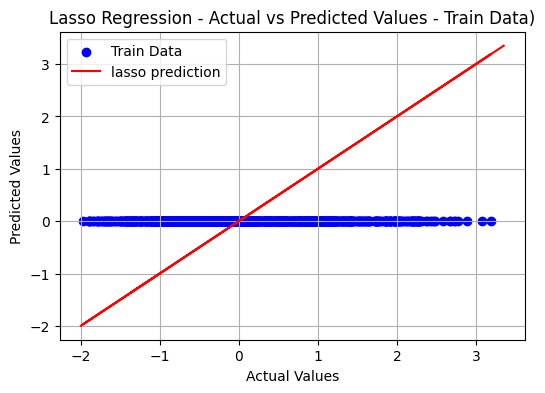

<ipython-input-166-00ced96e9367>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', color = 'red')


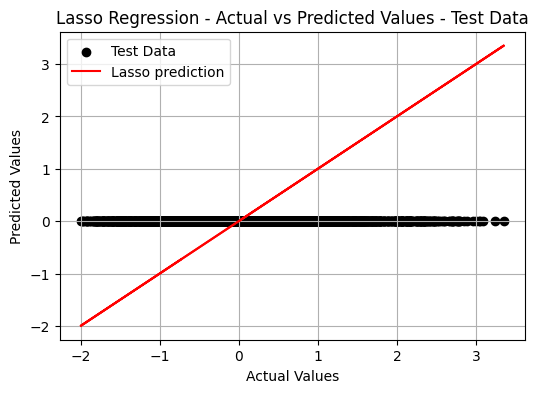

In [166]:
# Visualizing Lasso Regression - Train data
plt.figure(figsize=(6, 4))
plt.scatter(y_train, y_pred_lasso_train, color='blue', label='Train Data')
plt.plot(y_train, y_train, color='red', label='lasso prediction')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', color = 'red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression - Actual vs Predicted Values - Train Data)')
plt.legend()
plt.grid(True)
plt.show()

# Visualizing Lasso Regression - Test data
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_lasso_test, color='black', label='Test Data')
plt.plot(y_test, y_test, color='red', label='Lasso prediction')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', color = 'red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression - Actual vs Predicted Values - Test Data')
plt.legend()
plt.grid(True)
plt.show()

#### *ALTERNATIVE LASSO REGRESSION with GridSearchCV*



Using CV: It uses cross-validation and allows us to evaluate the performance of the estimator for different sets of hyperparameters.

source: https://medium.com/geekculture/regularization-using-pipeline-gridsearchcv-f377946e39d1



In [167]:
# Defining the grid of alpha values
param_grid = {
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}


*   Cross-validation is a statistical technique used to estimate the performance or accuracy of a machine learning model. The purpose is to prevent overfitting.
*   GridSearchCV is a tool that helps to find the best settings for our model by trying out different combinations of options. It uses cross-validation to test each combination and see which one works best overall.



In [168]:
# For hyperparameter tunning, we need GridSearchCV ()
from sklearn.model_selection import GridSearchCV

# Performing GridSearchCV with cross-validation
lasso_cv = GridSearchCV(lasso_model, param_grid, cv=5, n_jobs=-1)  #jobs=-1: all the cores available on the machine will be used
lasso_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [169]:
# Prediction on Train and Test data
lasso_cv_train_pred = lasso_cv.predict(x_train)
lasso_cv_test_pred = lasso_cv.predict(x_test)

# MSE as a performance measure
lasso_cv_train_performance = mean_squared_error(y_train, lasso_cv_train_pred)
lasso_cv_test_performance = mean_squared_error(y_test, lasso_cv_test_pred)

print(f"Alternative Lasso Train performance (MSE): \t{lasso_cv_train_performance:.6f}")
print(f"AlternativeLasso Test performance (MSE): \t{lasso_cv_test_performance:.6f}")

Alternative Lasso Train performance (MSE): 	0.003227
AlternativeLasso Test performance (MSE): 	0.003293


In [170]:
# The best alpha model
lasso_cv.best_estimator_

Lasso(alpha=0.0001)

In [171]:
# Here i created a new model using the best estimated parameter
lasso2 = Lasso(alpha=0.001)
lasso2.fit(x_train, y_train)

Lasso(alpha=0.001)

In [172]:
# Best Estimated parameters:
lasso2_theta_1_to_5 = theta_0 = lasso2.coef_
lasso2_theta_0 = lasso2.intercept_

# Combinining all thetas into one array
theta_hat_lasso2 = np.append(theta_0, theta_1_to_5)
print(f"Best estimated parameters for Lasso Regression: \ntheta_0: {lasso2_theta_0} \ntheta_1_to_5: {lasso2_theta_1_to_5}")

Best estimated parameters for Lasso Regression: 
theta_0: -1.2391689529575548e-16 
theta_1_to_5: [ 4.87027129e-01 -6.04386590e-01  2.24715784e-01  1.25707348e+00
 -2.57379841e-04]


<ipython-input-173-9738c2f3d7a0>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k-', color='red', label='Prediction')  # Add diagonal line


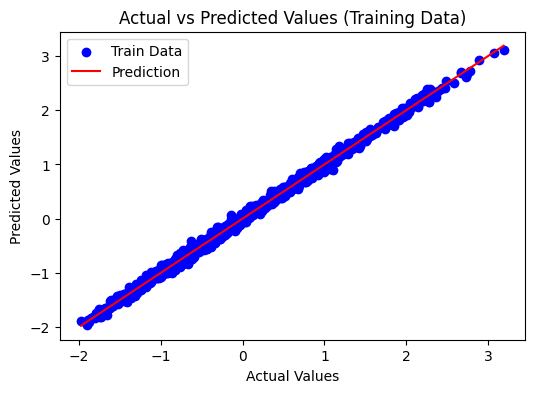

<ipython-input-173-9738c2f3d7a0>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', color='red', label='Prediction')  # Add diagonal line


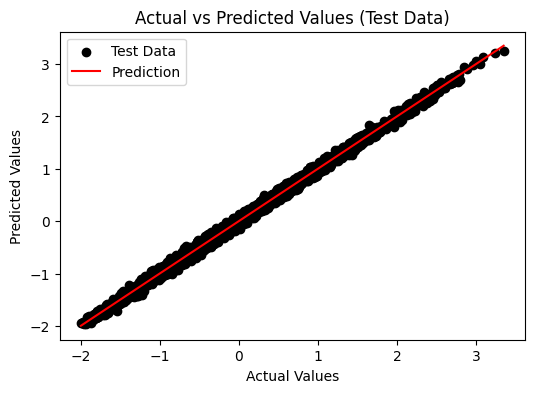

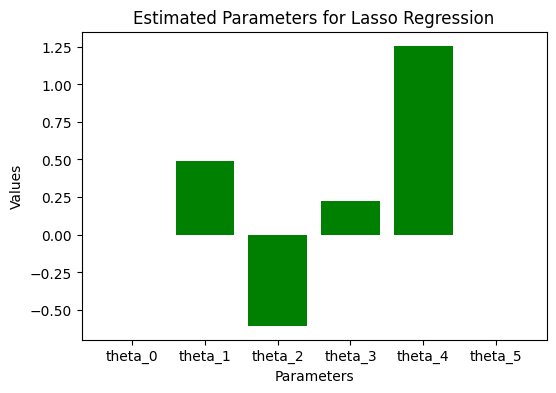

In [173]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values for training data
plt.figure(figsize=(6, 4))
plt.scatter(y_train, lasso_cv_train_pred, color='blue', label='Train Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k-', color='red', label='Prediction')  # Add diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Training Data)')
plt.legend()
plt.show()

# Plot actual vs predicted values for test data
plt.figure(figsize=(6, 4))
plt.scatter(y_test, lasso_cv_test_pred, color='black', label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', color='red', label='Prediction')  # Add diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test Data)')
plt.legend()
plt.show()

# Plot estimated parameters
plt.figure(figsize=(6, 4))
plt.bar(['theta_0'] + [f'theta_{i}' for i in range(1, 6)], np.append(lasso2_theta_0, lasso2_theta_1_to_5), color='green')
plt.xlabel('Parameters')
plt.ylabel('Values')
plt.title('Estimated Parameters for Lasso Regression')
plt.show()

### COMPARISON TABLE

Based on the compared MSE results for different models, LR and Lasso regression with using best estimated paramaters have similar performance, with very low MSE values on both the training and test sets. However, Lasso Regression has significantly higher MSE values on both sets which indicates that it might be overfitting the training data and resulted in poor generaliztion to unseed data.

In [174]:
# Comparing Linear and Lasso regression in table form:
from tabulate import tabulate
# Data
data = [
    ["Linear Regression", f"{train_performance:.6f}", f"{test_performance:.6f}"],
    ["Lasso Regression", f"{lasso_train_mse:.6f}", f"{lasso_test_mse:.6f}"],
    ["Alt Lasso Regression", f"{lasso_cv_train_performance:.6f}", f"{lasso_cv_test_performance:.6f}"]
]

# Headers
headers = ["Model", "MSE Train" , "MSE Test"]

# Creating table
table = tabulate(data, headers, tablefmt="pretty")
print(table)

+----------------------+-----------+----------+
|        Model         | MSE Train | MSE Test |
+----------------------+-----------+----------+
|  Linear Regression   | 0.003227  | 0.003294 |
|   Lasso Regression   | 1.000000  | 0.966799 |
| Alt Lasso Regression | 0.003227  | 0.003293 |
+----------------------+-----------+----------+


## Linear regression Gradient Descent: ?

During the lectures we have seen that, given a model $f(x; {\boldsymbol \theta})$ it is possible minimize the training error iteratively using gradient descent:


$${\boldsymbol \theta}^{i+1} \gets {\boldsymbol \theta}^i - \varepsilon_L \frac{\partial V_n({\boldsymbol \theta})}{\partial {\boldsymbol \theta}} \bigg \rvert_{{\boldsymbol \theta} = {\boldsymbol \theta}^i}$$

Consider the mean squared error,
$$V_n({\boldsymbol \theta}) = {1 \over n}\sum_{i=1}^n\left(y_i - f(x_i; \boldsymbol \theta)\right)^2$$
In our case $f(x_i; \boldsymbol \theta)$ is linear: $f(x_i; \boldsymbol \theta) = \theta_0 + x_{i1} \theta_1 + x_{i2} \theta_2+ \dots + x_{id}\theta_d.$

So, we can write the gradient as:

$$\frac{\partial V_n({\boldsymbol \theta})}{\partial {\boldsymbol \theta}} =
\left[
\begin{array}{c}
\frac{\partial V_n({\boldsymbol \theta})}{\partial {\theta_0}} \\
\frac{\partial V_n({\boldsymbol \theta})}{\partial {\theta_1}} \\
\vdots \\
\frac{\partial V_n({\boldsymbol \theta})}{\partial {\theta_d}}
\end{array}
\right] =
\left[
\begin{array}{c}
-{2 \over n}\sum_{i=1}^n\left(y_i - f(x_i; \boldsymbol \theta)\right) \\
-{2 \over n}\sum_{i=1}^n\left(y_i - f(x_i; \boldsymbol \theta)\right)x_{i1} \\
\vdots \\
-{2 \over n}\sum_{i=1}^n\left(y_i - f(x_i; \boldsymbol \theta)\right)x_{id}
\end{array}
\right] = -{2 \over n}X^T(Y - X\boldsymbol \theta)$$

## *HIDE*

#### Method 1: In below, the parameters are initialized with zeros directly, without the need for a separate function.

In [175]:
# Initializing Parameters including the intercept) with zeros
theta = np.zeros((x_train.shape[1], 1))
learning_rate = 0.001  # Set the learning rate
num_iterations = 1000  # Set the number of iterations

# Defining the MSE
def mean_squared_error(y_train, y_pred):
    return np.mean((y_train - y_pred) ** 2)

# Gradient Descent Algorithm
def gradient_descent(x, y, theta, learning_rate, num_iterations):
    m = len(y)  # Number of training examples

    for i in range(num_iterations):
        # Calculating predictions
        predictions = np.dot(x, theta)

        # Calculating error
        error = predictions - y

        # Updating parameters
        gradient = np.dot(x.T, error) / m
        theta -= learning_rate * gradient

        # Print
        if i % 100 == 0:
            mse_grad = mean_squared_error(y_train, predictions)
            print(f"Iteration {i}: Cost = {mse_grad}")

    return theta

# Training Loop
theta = gradient_descent(x_train, y_train.reshape(-1, 1), theta, learning_rate, num_iterations)

# Prediction
def predict(x, theta):
    return np.dot(x, theta)

# Predictions on training and test data set
train_predictions = predict(x_train, theta)
test_predictions = predict(x_test, theta)

# Calculating MSE
train_mse = mean_squared_error(y_train.reshape(-1, 1), train_predictions)
test_mse = mean_squared_error(y_test.reshape(-1, 1), test_predictions)


print(f"Linear Regression with Gradient Descent MSE - Train: {train_mse}")
print(f"Linear Regression with Gradient Descent MSE - Test: {test_mse}")


Iteration 0: Cost = 1.0000000000000002
Iteration 100: Cost = 1.0104792444160233
Iteration 200: Cost = 1.0359017556395793
Iteration 300: Cost = 1.0695602749890654
Iteration 400: Cost = 1.1070589164831617
Iteration 500: Cost = 1.1455872757985064
Iteration 600: Cost = 1.1834131574376714
Iteration 700: Cost = 1.2195293977620285
Iteration 800: Cost = 1.253409117221232
Iteration 900: Cost = 1.284837106057818
Linear Regression with Gradient Descent MSE - Train: 0.3402444350126651
Linear Regression with Gradient Descent MSE - Test: 0.33147574565751514


Text(0.5, 0.92, 'Lost function in different Theta')

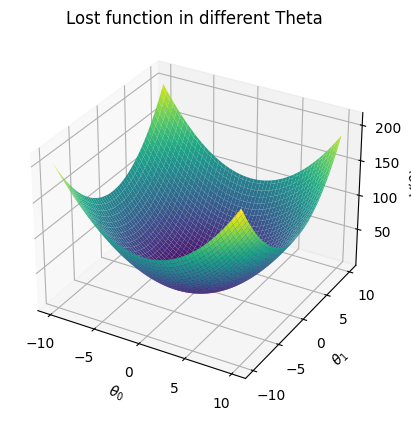

In [176]:
from mpl_toolkits.mplot3d import Axes3D

# Defining a range of theta values for plotting
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-10, 10, 100)

# Initializing a meshgrid for theta0 and theta1
theta0_mesh, theta1_mesh = np.meshgrid(theta0_vals, theta1_vals)

# Initializing an array to store the cost values
zs1 = np.zeros((len(theta0_vals), len(theta1_vals)))

# Calculate the cost for each combination of theta0 and theta1
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        theta[0] = theta0_vals[i]
        theta[1] = theta1_vals[j]
        zs1 [i, j] = mean_squared_error(y_train.reshape(-1, 1), np.dot(x_train, theta))

# Plotting the Lost function in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_mesh, theta1_mesh, zs1, cmap='viridis')


ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$V(\theta)$')
ax.set_title('Lost function in different Theta')

#### Method 2: MSE is defined with L2 regularization to prevent overfitting

In [177]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the model family function
def model_function(x, theta):
    x1, x2 = x[:, 0], x[:, 1]
    y = theta[0] + theta[1] * x1 + theta[2] * x2 + theta[3] * np.cos(x1) + theta[4] * x2**2 + theta[5] * np.tanh(x1)
    return y

# Preprocessing input data to include additional features and scale features
def preprocess_data(x):
    x_scaled = (x - np.mean(x, axis=0)) / np.std(x, axis=0)  # Feature scaling
    x1_scaled, x2_scaled = x_scaled[:, 0], x_scaled[:, 1]
    x_compact = np.column_stack((np.ones(x_scaled.shape[0]), x1_scaled, x2_scaled, np.cos(x1_scaled), x2_scaled**2, np.tanh(x1_scaled)))
    return x_compact

# Initializing parameters with zeros
def initialize_parameters(x):
    return np.zeros((x.shape[1], 1))

# Defining MSE function with regularization
def mean_squared_error(X, Y, theta, lambda_reg=0):
    m = len(Y)  # Number of training examples
    regularization_term = (lambda_reg / (2 * m)) * np.sum(theta[1:]**2)  # Regularization term
    error = Y - np.dot(X, theta)
    mse = (1 / (2 * m)) * np.dot(error.T, error) + regularization_term
    return mse

# Gradient Descent  with regularization
def gradient_descent(X, Y, theta, learning_rate, num_iterations, lambda_reg=0):
    m = len(Y)  # Number of training examples
    loss_history = []  # Store loss over iterations

    for i in range(num_iterations):
        # Calculating predictions
        predictions = np.dot(X, theta)

        # Calculating error
        error = predictions - Y

        # Updating parameters
        regularization_term = (lambda_reg / m) * theta
        regularization_term[0] = 0  # Exclude regularization for bias term
        gradient = (-1 / m) * np.dot(X.T, error) + regularization_term
        theta -= learning_rate * gradient

        # Calculating loss and store it
        loss = mean_squared_error(X, Y, theta, lambda_reg=lambda_reg)
        loss_history.append(loss)

    return theta, loss_history

# Loading and preprocessing data
x_train_scaled = preprocess_data(x_train)
x_test_scaled = preprocess_data(x_test)

# Initializing parameters
theta_initial = initialize_parameters(x_train_scaled)

# Hyperparameters
learning_rate = 0.01
num_iterations = 1000
lambda_reg = 0.1  # Regularization parameter

# Run Gradient Descent
theta_final, loss_history = gradient_descent(x_train_scaled, y_train.reshape(-1, 1), theta_initial, learning_rate, num_iterations, lambda_reg=lambda_reg)

# Predictions on the training and testing data
train_predictions = np.dot(x_train_scaled, theta_final)
test_predictions = np.dot(x_test_scaled, theta_final)

# Calculate MSE for training and testing data
train_mse = mean_squared_error(x_train_scaled, y_train.reshape(-1, 1), theta_final, lambda_reg=lambda_reg)
test_mse = mean_squared_error(x_test_scaled, y_test.reshape(-1, 1), theta_final, lambda_reg=lambda_reg)

print('Optimal Thetas:', theta_final.T)
print('2 Linear Regression with Gradient Descent MSE - Train:', train_mse)
print('2 Linear Regression with Gradient Descent MSE - Test:', test_mse)

Optimal Thetas: [[-6.87081795e+10 -1.96274251e+08  2.33937415e+09 -4.07300508e+10
  -9.68897338e+10 -4.93686884e+08]]
2 Linear Regression with Gradient Descent MSE - Train: [[2.16712533e+22]]
2 Linear Regression with Gradient Descent MSE - Test: [[2.19192676e+22]]


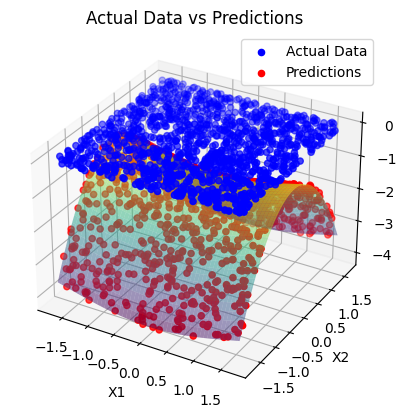

Text(0.5, 0.92, 'Lost function in different Thetas')

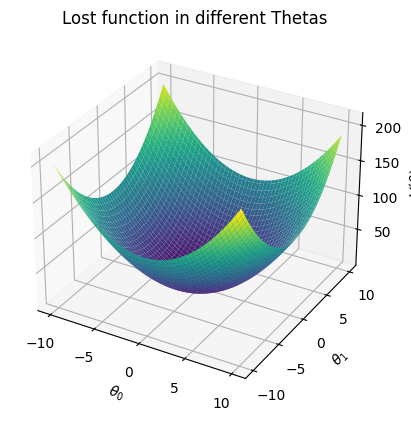

In [178]:
# Create a meshgrid of x1 and x2 values
x1_values = np.linspace(min(x_train_scaled[:, 1]), max(x_train_scaled[:, 1]), 100)
x2_values = np.linspace(min(x_train_scaled[:, 2]), max(x_train_scaled[:, 2]), 100)
x1_mesh, x2_mesh = np.meshgrid(x1_values, x2_values)

# Create a compact version of the meshgrid
x1_mesh_flat = x1_mesh.flatten()
x2_mesh_flat = x2_mesh.flatten()
x_mesh_compact = np.column_stack((np.ones(len(x1_mesh_flat)), x1_mesh_flat, x2_mesh_flat, np.cos(x1_mesh_flat), x2_mesh_flat**2, np.tanh(x1_mesh_flat)))

# Calculate model predictions for the meshgrid
mesh_predictions = np.dot(x_mesh_compact, theta_final).reshape(x1_mesh.shape)

# Plot actual data points and predictions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train_scaled[:, 1], x_train_scaled[:, 2], y_train, color='blue', label='Actual Data')
ax.scatter(x_train_scaled[:, 1], x_train_scaled[:, 2], train_predictions, color='red', label='Predictions')

# Plot model surface
ax.plot_surface(x1_mesh, x2_mesh, mesh_predictions, alpha=0.5, cmap='viridis')

# Set labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Actual Data vs Predictions')

# Add legend
ax.legend()

# Show plot
plt.show()

## Plot the cost function in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_mesh, theta1_mesh, zs1, cmap='viridis')

# Set labels and title
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$V(\theta)$')
ax.set_title('Lost function in different Thetas')

<a id="ref2"></a>
# TASK 2: Non-Linear Regression

Consider any family of non-linear models of your choice to address the above regression problem (same data as T1):

*   Evaluate the test performance of your model using the mean squared error as a performance measure;
*   Compare your model with the linear regression of task 1. Which one is statistically better?

## Uaing the Polynomial Regression

In task 2, I used a Polynomial regression with a pipeline that includes polynomial feature generation, scaling, and MLP regression.


*   To improve the performance of the polynomial regression model, I used GridSearchCV to search for the optimal degree of polynomial features and the regularization parameter for MLPRegressor.



In [179]:
import numpy as np
import pandas as pd
import io
import requests
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Load data
url = 'https://drive.switch.ch/index.php/s/37RuoA3Mgt9Rqah/download'
response = requests.get(url)
data = np.load(io.BytesIO(response.content))

# Convert data to DataFrame
df = pd.DataFrame(data['x'], columns=['x1', 'x2'])
df['y'] = data['y']

# Split data into features (x) and target variable (y)
x = data['x']
y = data['y']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Normalzing
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Define the degree of the polynomial features
degree = 2

# Create a pipeline for polynomial feature generation, scaling, and MLP regression
polyreg_model2 = make_pipeline(PolynomialFeatures(degree),
                              StandardScaler(),
                              MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42))

# Defining hyperparameters for grid search for best parameter
param_grid2 = {'polynomialfeatures__degree': [2, 3, 4],
              'mlpregressor__alpha': [0.0001, 0.001, 0.01]}  # Regularization parameter for MLPRegressor

# Performing grid search with cross-validation
grid_search2 = GridSearchCV(polyreg_model2, param_grid2, cv=5, scoring='neg_mean_squared_error')
grid_search2.fit(x_train_scaled, y_train)

# Getting the best model from grid search
best_polyreg_model2 = grid_search2.best_estimator_

# Fitting the model to the training data
polyreg_model2.fit(x_train_scaled, y_train)

# Make predictions on the test set and train set
y_pred_poly_test2 = polyreg_model2.predict(x_test_scaled)
y_pred_poly_train2 = polyreg_model2.predict(x_train_scaled)

# Calculating MSE as a performance measure
mse_poly_test2 = mean_squared_error(y_test, y_pred_poly_test2)
mse_poly_train2 = mean_squared_error(y_train, y_pred_poly_train2)

print("Best parameters:", grid_search2.best_params_)
print("Polynomial Regression MSE - Test:", mse_poly_test2)
print("Polynomial Regression MSE - Train:", mse_poly_train2)


Best parameters: {'mlpregressor__alpha': 0.0001, 'polynomialfeatures__degree': 2}
Polynomial Regression MSE - Test: 1.4744601964957242
Polynomial Regression MSE - Train: 1.3804094576744326


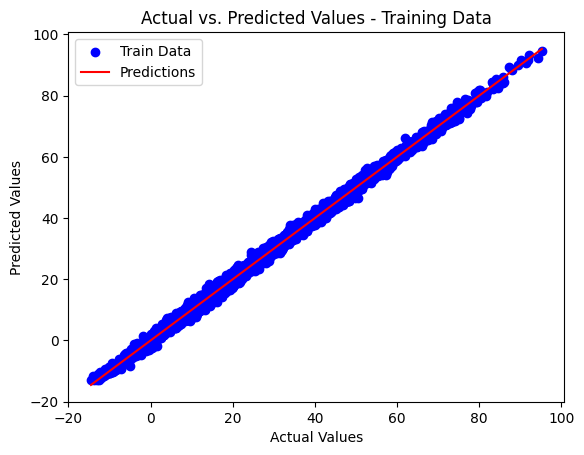

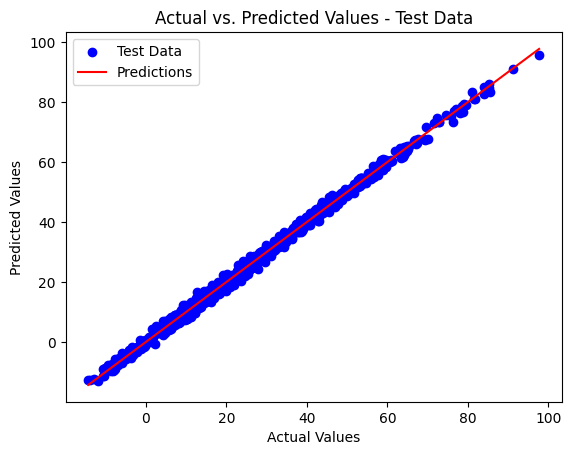

In [180]:
# Plot the results as a scatter plot
import matplotlib.pyplot as plt

plt.scatter(y_train, y_pred_poly_train2, color='blue', label='Train Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', label='Predictions')
plt.title('Actual vs. Predicted Values - Training Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()



plt.scatter(y_test, y_pred_poly_test2, color='blue', label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Predictions')
plt.title('Actual vs. Predicted Values - Test Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Comparison between Linear Regression and Polynomial Regression


In [181]:
from scipy.stats import ttest_rel
from tabulate import tabulate

# Perform a paired t-test
t_statistic, p_value = ttest_rel([test_performance, train_performance], [mse_poly_test2, mse_poly_train2])

# Print the t-test results
print("Paired t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in performance between linear regression and polynomial regression.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in performance between linear regression and polynomial regression.")

# Define the table data
mse_results = [
    ["Linear Regression", f"{test_performance:.6f}", f"{train_performance:.6f}"],
    ["Polynomial Regression", f"{mse_poly_test2:.6f}", f"{mse_poly_train2:.6f}"]
]

# Print the MSE comparison table
print(tabulate(mse_results, headers=["Model", "MSE - Test", "MSE - Train"], tablefmt="fancy_grid"))


Paired t-test results:
T-statistic: -30.30694870752715
P-value: 0.020998118157154504
Reject the null hypothesis: There is a significant difference in performance between linear regression and polynomial regression.
╒═══════════════════════╤══════════════╤═══════════════╕
│ Model                 │   MSE - Test │   MSE - Train │
╞═══════════════════════╪══════════════╪═══════════════╡
│ Linear Regression     │     0.003294 │      0.003227 │
├───────────────────────┼──────────────┼───────────────┤
│ Polynomial Regression │     1.47446  │      1.38041  │
╘═══════════════════════╧══════════════╧═══════════════╛


In [182]:
from tabulate import tabulate

# Compute the mean MSE for LR with Gradient Descent
mean_test_mse = test_mse.mean()
mean_train_mse = train_mse.mean()

mse_results = [
    ["Linear Regression", f"{test_performance:.6f}", f"{train_performance:.6f}"],
    ["LR with Gradient Descent", f"{mean_test_mse:.6f}", f"{mean_train_mse:.6f}"],
    ["Lasso Regression", f"{lasso_test_mse:.6f}", f"{lasso_train_mse:.6f}"],
    ["Polynomial Regression", f"{mse_poly_test2:.6f}", f"{mse_poly_train2:.6f}"],
]

print(tabulate(mse_results, headers=["Models", "MSE - Test", "MSE - Train"], tablefmt="fancy_grid"))

╒══════════════════════════╤══════════════╤═══════════════╕
│ Models                   │   MSE - Test │   MSE - Train │
╞══════════════════════════╪══════════════╪═══════════════╡
│ Linear Regression        │  0.003294    │   0.003227    │
├──────────────────────────┼──────────────┼───────────────┤
│ LR with Gradient Descent │  2.19193e+22 │   2.16713e+22 │
├──────────────────────────┼──────────────┼───────────────┤
│ Lasso Regression         │  0.966799    │   1           │
├──────────────────────────┼──────────────┼───────────────┤
│ Polynomial Regression    │  1.47446     │   1.38041     │
╘══════════════════════════╧══════════════╧═══════════════╛
